##### Import the libraries that will allow us to communicate with SQL (Python Magic)

In [1]:
# load relevant libraries
%load_ext sql
import ibm_db
import ibm_db_sa
import sqlalchemy

##### Now we have access to SQL magic. With our first SQL magic command, we'll connect to a Db2 database. Retrieve the information from "uri:", copying from your username onward (skip the db2://  !!) 

<a ><img src = "https://ibm.box.com/shared/static/uy78gy1uq3uj6fkvd4muzy5zcr62tb72.png" width = 1000, align = "center"></a>

In [39]:
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

##### As a note, we can use %%sql at the top of a cell to indicate we want the ENTIRE cell to be treated as SQL.
##### Let's make sure the data is reading in A.O.K. 

In [10]:
%%sql
select * from total_data
limit 10

 * ibm_db_sa://xkv89398:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


gdp_per_capita,literacy,infant_mortality_per_1000,net_migration,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy__gdp_per_capita_,family,health__life_expectancy_,freedom,generosity,trust__government_corruption_,dystopia_residual
800,80.60,88.29,0.00,Zambia,116,4.51,4.64,4.38,0.63,1.00,0.25,0.46,0.24,0.07,1.82
700,36.00,163.07,23.06,Afghanistan,141,3.79,3.87,3.71,0.40,0.58,0.18,0.10,0.31,0.06,2.15
4500,86.50,21.52,-4.93,Albania,109,4.64,4.75,4.53,0.99,0.80,0.73,0.38,0.20,0.03,1.49
6000,70.00,31.00,-0.39,Algeria,53,5.87,5.97,5.76,1.09,1.14,0.61,0.23,0.06,0.14,2.56
1900,42.00,191.19,0.00,Angola,140,3.79,3.95,3.63,0.85,1.10,0.04,0.00,0.09,0.06,1.61
11200,97.10,15.18,0.61,Argentina,24,6.59,6.69,6.50,1.18,1.44,0.69,0.49,0.10,0.05,2.61
3500,98.60,23.28,-6.47,Armenia,121,4.37,4.46,4.28,0.90,1.00,0.63,0.19,0.08,0.02,1.52
29000,100.00,4.69,3.98,Australia,10,7.28,7.35,7.21,1.48,1.51,0.84,0.60,0.47,0.30,2.06
30000,98.00,4.66,2.00,Austria,13,7.00,7.07,6.94,1.48,1.45,0.81,0.56,0.31,0.22,2.13
3400,97.00,81.74,-4.90,Azerbaijan,85,5.23,5.29,5.16,1.15,1.15,0.54,0.39,0.04,0.18,1.76


##### To graph our columns, we'll need to convert what we'd like to graph into a dataframe in Python:

In [36]:
happiness_gdp = %sql SELECT gdp_per_capita, happiness_score from total_data;

 * ibm_db_sa://xkv89398:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


 * ibm_db_sa://xkv89398:***@dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net:50000/BLUDB
Done.


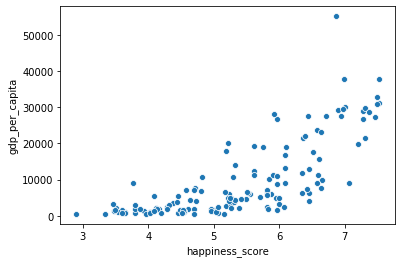

In [44]:
# create a dataframe in Python with the two rows you are looking to graph:
happiness_gdp = %sql SELECT gdp_per_capita, happiness_score from total_data;
dataframe = happiness_gdp.DataFrame()

# import/install Seaborn 
# !pip install seaborn
%matplotlib inline
import seaborn

# last but not least, plot! 
plot = seaborn.scatterplot(x='happiness_score',y='gdp_per_capita', data=dataframe)

##### We did it!